In [161]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [162]:
df=pd.read_csv('heart.csv')
df.head()
df.count()

age         303
sex         303
cp          303
trestbps    303
chol        303
fbs         303
restecg     303
thalach     303
exang       303
oldpeak     303
slope       303
ca          303
thal        303
target      303
dtype: int64

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [164]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [165]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [166]:
from sklearn.model_selection import train_test_split

In [167]:
df.count()

age         303
sex         303
cp          303
trestbps    303
chol        303
fbs         303
restecg     303
thalach     303
exang       303
oldpeak     303
slope       303
ca          303
thal        303
target      303
dtype: int64

In [168]:
X = df.drop(['target'],axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

In [169]:
y_test.count()

91

In [170]:
from sklearn.tree import DecisionTreeClassifier

In [171]:
dtree = DecisionTreeClassifier(random_state=0, criterion = 'gini')

In [172]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [173]:
from sklearn import tree

train_char_label = ['No', 'Yes']  ## this is the Labels for for any decision Node
Credit_Tree_File = open('C:\\Users\\Amit.Jain\\Desktop\\PGP-DSBA\\week13_Decision_Tree_CART\\graded_quiz.dot','w')
dot_data = tree.export_graphviz(dtree, out_file=Credit_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))

Credit_Tree_File.close()


In [174]:
# importance of features in the tree building ( The importance of a feature is computed as the 
#(normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print (pd.DataFrame(dtree.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by="Imp"))


               Imp
restecg   0.013032
exang     0.020774
trestbps  0.027304
fbs       0.028669
thalach   0.047396
slope     0.048749
sex       0.054394
chol      0.067471
thal      0.074463
age       0.080607
ca        0.124819
oldpeak   0.153450
cp        0.258870


In [175]:
y_predict = dtree.predict(X_test)
y_predict

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0], dtype=int64)

In [176]:
reg_dt_model = DecisionTreeClassifier(criterion = 'gini', max_depth = 7,min_samples_leaf=10,min_samples_split=30)
reg_dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=10, min_samples_split=30)

In [177]:
reg_dt_model.score(X_train,y_train)
reg_dt_model.score(X_test,y_test)

0.7582417582417582

In [178]:
credit_tree_regularized = open('C:\\Users\\Amit.Jain\\Desktop\\PGP-DSBA\\week13_Decision_Tree_CART\\graded_quiz_regularized.dot','w')
dot_data = tree.export_graphviz(reg_dt_model, out_file= credit_tree_regularized , feature_names = list(X_train), class_names = list(train_char_label))

credit_tree_regularized.close()

print (pd.DataFrame(dtree.feature_importances_, columns = ["Imp"], index = X_train.columns).sort_values(by='Imp'))


               Imp
restecg   0.013032
exang     0.020774
trestbps  0.027304
fbs       0.028669
thalach   0.047396
slope     0.048749
sex       0.054394
chol      0.067471
thal      0.074463
age       0.080607
ca        0.124819
oldpeak   0.153450
cp        0.258870


In [179]:
ytrain_predict = reg_dt_model.predict(X_train)
ytest_predict = reg_dt_model.predict(X_test)

In [180]:
ytest_predict

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0], dtype=int64)

In [181]:
import matplotlib.pyplot as plt

AUC: 0.932


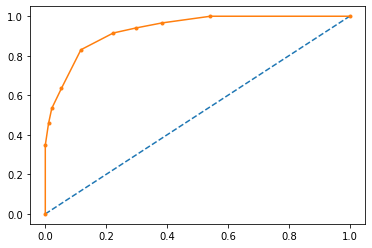

In [182]:
# AUC and ROC for the training data

# predict probabilities
probs = reg_dt_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

AUC: 0.834


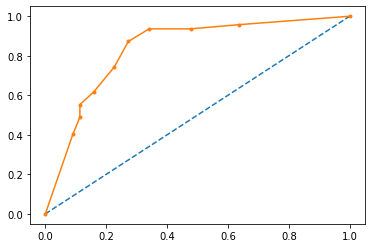

In [183]:
# AUC and ROC for the test data


# predict probabilities
probs = reg_dt_model.predict_proba(X_test)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

In [184]:
from sklearn.metrics import classification_report,confusion_matrix

In [185]:
print(classification_report(y_train, ytrain_predict))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84        94
           1       0.90      0.83      0.86       118

    accuracy                           0.85       212
   macro avg       0.85      0.86      0.85       212
weighted avg       0.86      0.85      0.85       212



In [186]:
print(classification_report(y_test, ytest_predict))

              precision    recall  f1-score   support

           0       0.74      0.77      0.76        44
           1       0.78      0.74      0.76        47

    accuracy                           0.76        91
   macro avg       0.76      0.76      0.76        91
weighted avg       0.76      0.76      0.76        91



In [187]:
confusion_matrix(y_train, ytrain_predict)

array([[83, 11],
       [20, 98]], dtype=int64)

In [188]:
confusion_matrix(y_test, ytest_predict)

array([[34, 10],
       [12, 35]], dtype=int64)

In [189]:
reg_dt_model.score(X_train,y_train)

0.8537735849056604

In [190]:
reg_dt_model.score(X_test,y_test)

0.7582417582417582

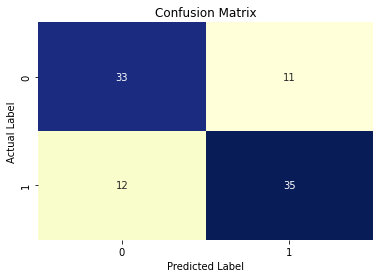

In [191]:
predictions = dtree.predict(X_test)
sns.heatmap(confusion_matrix(y_test,predictions),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()

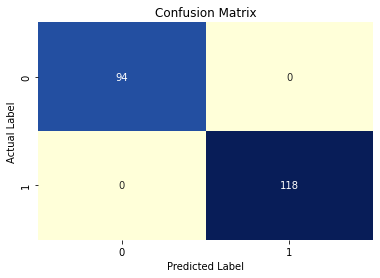

In [192]:
predictions = dtree.predict(X_train)
sns.heatmap(confusion_matrix(y_train,predictions),annot=True, fmt='d', cbar=False,cmap='YlGnBu')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.show()